In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1900)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1900)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

727

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tarudant
City not found. Skipping...
Processing Record 3 of Set 1 | fort nelson
Processing Record 4 of Set 1 | kaeo
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | gari
Processing Record 16 of Set 1 | carlos chagas
Processing Record 17 of Set 1 | port moresby
Processing Record 18 of Set 1 | kloulklubed
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 1 | guarapari
Proces

Processing Record 33 of Set 4 | pangai
Processing Record 34 of Set 4 | kisanga
Processing Record 35 of Set 4 | mount isa
Processing Record 36 of Set 4 | krasnoborsk
Processing Record 37 of Set 4 | fuling
Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | tingi
Processing Record 40 of Set 4 | kankaanpaa
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | voh
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | mexico
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | katsuura
Processing Record 1 of Set 5 | santa cruz del sur
Processing Record 2 of Set 5 | jasper
Processing Record 3 of Set 5 | chara
Processing Record 4 of Set 5 | khor
Processing Record 5 of Set 5 | wau
Processing Record 6 of Set 5 | port lin

Processing Record 28 of Set 8 | hobyo
Processing Record 29 of Set 8 | nguiu
City not found. Skipping...
Processing Record 30 of Set 8 | vanimo
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | imbituba
Processing Record 34 of Set 8 | sorong
Processing Record 35 of Set 8 | karamea
City not found. Skipping...
Processing Record 36 of Set 8 | ardakan
Processing Record 37 of Set 8 | peniche
Processing Record 38 of Set 8 | bad driburg
Processing Record 39 of Set 8 | kuche
City not found. Skipping...
Processing Record 40 of Set 8 | provideniya
Processing Record 41 of Set 8 | lambarene
Processing Record 42 of Set 8 | shkurinskaya
Processing Record 43 of Set 8 | tocopilla
Processing Record 44 of Set 8 | bowen
Processing Record 45 of Set 8 | arcata
Processing Record 46 of Set 8 | isangel
Processing Record 47 of Set 8 | arawa
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | jiddah
City not found. Skipping...


Processing Record 13 of Set 12 | dongkan
Processing Record 14 of Set 12 | niquelandia
Processing Record 15 of Set 12 | atbasar
Processing Record 16 of Set 12 | araouane
Processing Record 17 of Set 12 | kulhudhuffushi
Processing Record 18 of Set 12 | estelle
Processing Record 19 of Set 12 | grand gaube
Processing Record 20 of Set 12 | gazanjyk
Processing Record 21 of Set 12 | san francisco
Processing Record 22 of Set 12 | kandava
Processing Record 23 of Set 12 | ballina
Processing Record 24 of Set 12 | mitsamiouli
Processing Record 25 of Set 12 | natal
Processing Record 26 of Set 12 | vaasa
Processing Record 27 of Set 12 | bad sachsa
Processing Record 28 of Set 12 | lolua
City not found. Skipping...
Processing Record 29 of Set 12 | zuenoula
Processing Record 30 of Set 12 | blackwater
Processing Record 31 of Set 12 | pantihan
City not found. Skipping...
Processing Record 32 of Set 12 | china
Processing Record 33 of Set 12 | saint-pierre
Processing Record 34 of Set 12 | khandyga
Processin

In [7]:
len(city_data)

658

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.37,78,48,19.82,PF,2021-10-05 19:51:05
1,Fort Nelson,58.8053,-122.7002,36.99,65,75,3.44,CA,2021-10-05 19:51:05
2,Kaeo,-35.1000,173.7833,61.32,97,100,3.89,NZ,2021-10-05 19:51:06
3,Georgetown,5.4112,100.3354,78.73,90,40,3.00,MY,2021-10-05 19:51:06
4,Mataura,-46.1927,168.8643,49.48,96,100,5.17,NZ,2021-10-05 19:51:06
5,Punta Arenas,-53.1500,-70.9167,50.11,43,0,23.02,CL,2021-10-05 19:51:07
6,Busselton,-33.6500,115.3333,39.04,70,83,4.59,AU,2021-10-05 19:51:07
7,Chuy,-33.6971,-53.4616,63.84,58,0,7.16,UY,2021-10-05 19:51:08
8,Hithadhoo,-0.6000,73.0833,83.52,76,99,18.19,MV,2021-10-05 19:51:08
9,Hermanus,-34.4187,19.2345,57.79,84,13,9.22,ZA,2021-10-05 19:51:09


In [9]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-10-05 19:51:05,-23.1203,-134.9692,74.37,78,48,19.82
1,Fort Nelson,CA,2021-10-05 19:51:05,58.8053,-122.7002,36.99,65,75,3.44
2,Kaeo,NZ,2021-10-05 19:51:06,-35.1000,173.7833,61.32,97,100,3.89
3,Georgetown,MY,2021-10-05 19:51:06,5.4112,100.3354,78.73,90,40,3.00
4,Mataura,NZ,2021-10-05 19:51:06,-46.1927,168.8643,49.48,96,100,5.17
5,Punta Arenas,CL,2021-10-05 19:51:07,-53.1500,-70.9167,50.11,43,0,23.02
6,Busselton,AU,2021-10-05 19:51:07,-33.6500,115.3333,39.04,70,83,4.59
7,Chuy,UY,2021-10-05 19:51:08,-33.6971,-53.4616,63.84,58,0,7.16
8,Hithadhoo,MV,2021-10-05 19:51:08,-0.6000,73.0833,83.52,76,99,18.19
9,Hermanus,ZA,2021-10-05 19:51:09,-34.4187,19.2345,57.79,84,13,9.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

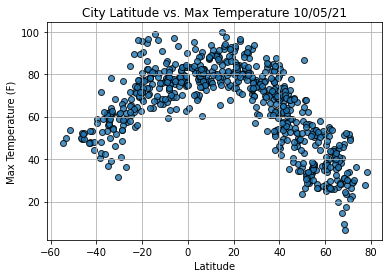

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Max_temp.png")

# Show plot.
plt.show()

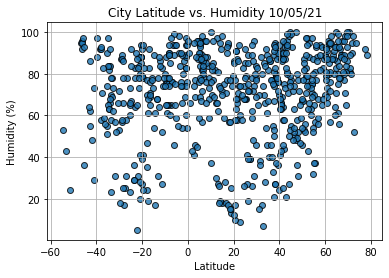

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Humidity.png")

# Show plot.
plt.show()

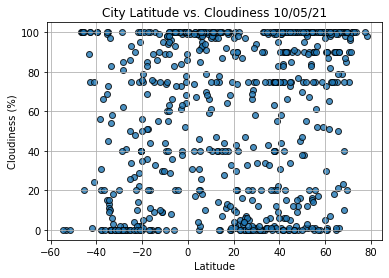

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Cloudiness.png")

# Show plot.
plt.show()

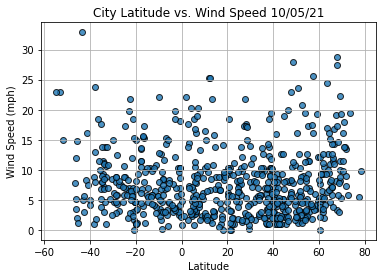

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Wind_Speed.png")

# Show plot.
plt.show()